In [1]:
import pandas as pd

In [2]:
from IPython.core.display import HTML
HTML('<style>{}</style>'.format(open('style-notebook.css').read()))

### Define the column names and read data from source file 

In [3]:
col_names = ['index', 'name', 'citation', 'author', 'number', 'date', 'court', 'coram', 'counsel', 'catchwords']
df = pd.read_table('raw.tsv', encoding='utf-8', header=None, names=col_names, index_col=0, parse_dates=True)

In [4]:
df.head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12479,Lee Kok Yong v Lee Guek Hua (alias Li Yuehua),[2007] SGHC 26,Tan Lee Meng J:,"D 1404/2004, RAS 95/2006, 96/2006",27 Feb 2007,High Court,Tan Lee Meng J,Lim Say Fang (Tan Lee & Partners) for the appe...,NaN
12480,Chia Kin Tuck v Leong Choon Kum and Another,[2005] SGHC 1,Lai Siu Chiu J:,"DC(T) 600872/2000, DA 23/2003, 24/2003, 25/200...",04 Jan 2005,High Court,Lai Siu Chiu J,Koh Tien Hua and Michelle Elias (Harry Elias P...,Restitution
12481,Ong and Co Pte Ltd v Lua Soo Theng,[2005] SGHC 6,MPH Rubin J:,Suit 98/2003,14 Jan 2005,High Court,MPH Rubin J,Andrew Ong Hock Sing and Tan Chuan Bing Kendal...,Contract
12482,Law Society of Singapore v Tay Soo Wan,[2005] SGHC 7,Yong Pung How CJ (delivering the judgment of t...,OS 987/2004,07 Jan 2005,High Court,"Chao Hick Tin JA, Tay Yong Kwang J, Yong Pung ...",Zaheer K Merchant (Madhavan Partnership) for a...,Legal Profession
12483,Koon Seng Construction Pte Ltd v Siem Seng Hin...,[2005] SGHC 8,MPH Rubin J:,"OS 1365/2000, Suit 268/2004",13 Jan 2005,High Court,MPH Rubin J,N Sreenivasan (Straits Law Practice LLC) for p...,Contract


### Quick check on the summary statistics of the data set

In [5]:
df.describe()

,name,citation,author,number,date,court,coram,counsel,catchwords
count,5388,5388,4500,5388,5388,5388,5388,5388,5282
unique,4900,5380,283,5272,2957,5,442,5323,3274
top,Lai Swee Lin Linda v Attorney-General,[2014] SGHC 207,Choo Han Teck J:,Criminal Case No 1 of 2012,26 August 2010,High Court,Choo Han Teck J,"Toh Kian Sing SC, Leong Kah Wah and Koh See Bi...",Civil Procedure
freq,7,2,484,4,10,4348,499,4,236


There are only 5380 unique citations when there are 5388 judgments in the data set. This suggests that there may be duplicate entries. 

### Removing duplicate entries based on the citation

In [6]:
df[df.duplicated('citation')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15509,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012(Summons No 395...,4 February 2014,High Court,Shaun Leong Li ShiongAR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and MrN...",Arbitration – International Arbitration Act (C...
15746,TYC Investment Pte Ltd and others v TayYun Chw...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...
15777,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,Lee Kim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) for the p...,Civil procedure – limitation;Contract – mistak...
15779,Koh Jing Kwang v Public Prosecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for the a...,CRIMINAL LAW – Offences – Grievous hurt;CRIMIN...
15825,Fairmacs Shipping & Transport Services Pte Ltd...,[2014] SGHC 262,Belinda Ang Saw Ean J:,Admiralty in Personam No 324 of 2011 (Registra...,12 December 2014,High Court,Belinda Ang Saw Ean J,Joseph Tan and Joanna Poh (Legal Solutions LLC...,Tort – Conversion;Damages – Assessment
16039,AQW v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...
18274,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law â€“ procedure;Administrativ...
18283,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure â€”Parties â€”Joinder;Statutor...


In [7]:
df[df.citation.str.contains('\[2014\] SGHCR 4')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15494,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012 (Summons No 39...,4 February 2014,High Court,Shaun Leong Li Shiong AR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and Mr ...",Arbitration – International Arbitration Act (C...
15509,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012(Summons No 395...,4 February 2014,High Court,Shaun Leong Li ShiongAR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and MrN...",Arbitration – International Arbitration Act (C...


We drop the duplicate rows from the data set.

In [8]:
df = df.drop(15509)

In [9]:
df[df.citation.str.contains('\[2014\] SGHC 192')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15733,TYC Investment Pte Ltd and others v Tay Yun Ch...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...
15746,TYC Investment Pte Ltd and others v TayYun Chw...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...


In [10]:
df = df.drop(15746)

In [11]:
df[df.citation.str.contains('\[2014\] SGHC 207')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15751,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,LeeKim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) forthe pl...,Civil procedure – limitation;Contract – mistak...
15777,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,Lee Kim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) for the p...,Civil procedure – limitation;Contract – mistak...


In [12]:
df = df.drop(15751)

In [13]:
df[df.citation.str.contains('\[2014\] SGHC 213')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15755,Koh Jing Kwang v PublicProsecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for theap...,CRIMINAL LAW – Offences – Grievoushurt;CRIMINA...
15779,Koh Jing Kwang v Public Prosecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for the a...,CRIMINAL LAW – Offences – Grievous hurt;CRIMIN...


In [14]:
df = df.drop(15755)

In [15]:
df[df.citation.str.contains('\[2014\] SGHC 262')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15800,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 262,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...
15825,Fairmacs Shipping & Transport Services Pte Ltd...,[2014] SGHC 262,Belinda Ang Saw Ean J:,Admiralty in Personam No 324 of 2011 (Registra...,12 December 2014,High Court,Belinda Ang Saw Ean J,Joseph Tan and Joanna Poh (Legal Solutions LLC...,Tort – Conversion;Damages – Assessment


These are not duplicates but are instead different entries with identical citations.

In [16]:
df[df.citation.str.contains('\[2014\] SGHC 242')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15814,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 242,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...


In [17]:
df[df.name.str.contains('Ong Kian Hoy')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15800,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 262,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...
15814,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 242,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...


A check on http://commonlii.org shows that the citation for judgment 15800 should be [2014] SGHC 242 and it turns out there is already an identical judgment 15814 with the correct citation in the data set, so we drop 15800 in favour of 15814.

In [18]:
df = df.drop(15800)

In [19]:
df[df.citation.str.contains('\[2015\] SGHC 134')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
16030,GAJ v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...
16039,AQW v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...


In [20]:
df = df.drop(16030)

In [21]:
df[df.citation.str.contains('\[2015\] SGCA 59')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18218,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law - procedure;Administrative ...
18274,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law â€“ procedure;Administrativ...


In [22]:
df = df.drop(18274)

In [23]:
df[df.citation.str.contains('\[2015\] SGCA 60')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18222,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure -Parties -Joinder;Statutory In...
18283,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure â€”Parties â€”Joinder;Statutor...


In [24]:
df = df.drop(18283)

### Summary statistics of the data set

In [25]:
df.describe()

,name,citation,author,number,date,court,coram,counsel,catchwords
count,5380,5380,4492,5380,5380,5380,5380,5380,5274
unique,4896,5380,283,5271,2957,5,441,5319,3269
top,Lai Swee Lin Linda v Attorney-General,[2007] 4 SLR 557; [2007] SGHC 138,Choo Han Teck J:,Criminal Case No 1 of 2012,26 August 2010,High Court,Choo Han Teck J,"Toh Kian Sing SC, Leong Kah Wah and Koh See Bi...",Civil Procedure
freq,7,1,484,4,10,4342,499,4,236


In [26]:
len(df[df.author.isnull()])

888

In [27]:
len(df[df.catchwords.isnull()])

106

There are 5380 judgments in the dataset. The 'author' column has 888 missing values. The 'catchwords' column has 106 missing values

### Check the datatypes of each column 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5380 entries, 12479 to 22915
Data columns (total 9 columns):
name          5380 non-null object
citation      5380 non-null object
author        4492 non-null object
number        5380 non-null object
date          5380 non-null object
court         5380 non-null object
coram         5380 non-null object
counsel       5380 non-null object
catchwords    5274 non-null object
dtypes: object(9)
memory usage: 420.3+ KB


### Converting the date column from object to datetime

In [29]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

Unknown string format


Converting the date column into datetime raises an error so we verify whether the dates are in the right format (day, month and year).

In [30]:
df[df.date.str.split().str.len() != 3]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15157,Ajmer Singh s/o Ajit Singh v Chua Hock Kwee,[2013] SGHC 59,Tay Yong Kwang J:,Magistrate’s Appeal No 158/2012/01,11March 2013,High Court,Tay Yong Kwang J,"Subhas Anandan, Sunil Sudheesan and Diana Ngia...",Criminal Law – Offences;Evidence – Weight of e...


The day and month for the date column in 15157 are joined together. This is fixed by adding the missing space. 

In [31]:
df.loc[15157, 'date'] = '11 March 2013'

In [32]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

Unknown string format


Attempting to convert the date column into datetime still raises the same error so we need to split the date values and check the day, month and year values.

In [33]:
dates = df.date.str.split(' ', expand=True)

In [34]:
dates[0].value_counts()

28    268
30    253
29    230
26    210
27    198
22    191
11    179
10    175
21    175
14    172
20    172
17    171
25    168
13    168
15    167
16    166
12    164
18    164
24    158
23    158
31    157
19    157
06    112
07    104
08    103
09    102
05     91
04     90
03     89
01     89
02     84
3      65
7      64
9      61
8      60
5      54
6      51
4      51
2      47
1      42
Name: 0, dtype: int64

The day values appear to be fine.

In [35]:
dates[1].value_counts()

May          491
April        313
July         268
Sep          261
March        260
January      246
November     237
Jul          237
Oct          235
October      233
Aug          232
August       223
Mar          222
Apr          220
September    215
Nov          214
February     214
Dec          189
Feb          184
Jan          184
Jun          179
December     162
June         157
Febuary        4
Name: 1, dtype: int64

For the month values, we see that there are 4 instances where February was misspelled as Febuary.

In [36]:
dates[2].value_counts()

2010     427
2015     396
2016     364
2009     355
2014     354
2013     344
2012     338
2011     334
2005     296
2008     295
2006     290
2007     283
2002     254
2017     236
2003     209
2001     208
2000     201
2004     190
2013.      3
2014.      1
2011.      1
2010.      1
Name: 2, dtype: int64

For the year values, there are 6 instances where there is a trailing dot.

In [37]:
df.date = df.date.str.replace('Febuary', 'February').str.strip('.')

The errors are fixed by correcting the misspelled months and removing the trailing dots.

In [38]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

The conversion is successful this time.

In [39]:
df.date.describe()

count                    5380
unique                   2948
top       2010-08-26 00:00:00
freq                       10
first     2000-01-03 00:00:00
last      2017-08-02 00:00:00
Name: date, dtype: object

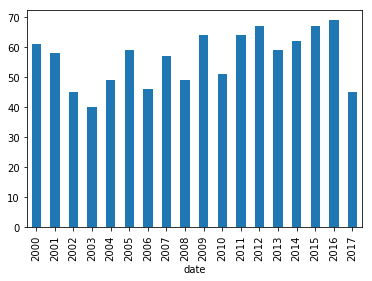

In [40]:
%matplotlib inline
df[df.court.str.contains('Appeal')].groupby(df.date.dt.year).size().plot(kind='bar')

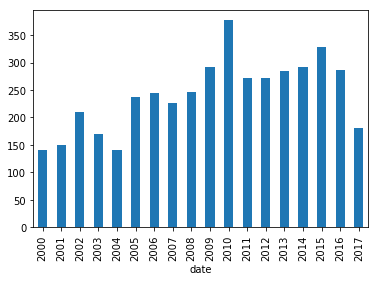

In [41]:
df[df.court.str.contains('High')].groupby(df.date.dt.year).size().plot(kind='bar')

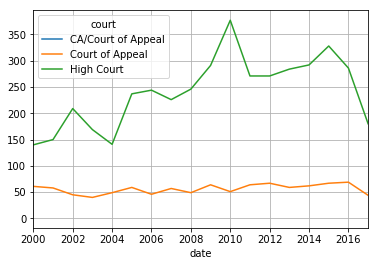

In [42]:
df[df.court.str.contains('Appeal|High')].groupby([df.court, df.date.dt.year]).size().unstack('court').plot(grid=True)

### Checking  the values in the court column

In [43]:
df.court.value_counts()

High Court                                  4342
Court of Appeal                             1011
Court of Three Judges                         14
Singapore International Commercial Court      12
CA/Court of Appeal                             1
Name: court, dtype: int64

There is one inconsistent value which shows 'CA/Court of Appeal' instead of the usual 'Court of Appeal'. This is corrected.

In [44]:
df.court = df.court.str.replace('CA/', '')
df.court.value_counts()

High Court                                  4342
Court of Appeal                             1012
Court of Three Judges                         14
Singapore International Commercial Court      12
Name: court, dtype: int64

### Summary statistics of the coram column 

We check the coram column to ensure that the data is clean. As there is a sizeable number of missing values in the author column, it may be useful to fill in these missing values from the coram values where possible.

In [45]:
df.coram.describe()

count                5380
unique                441
top       Choo Han Teck J
freq                  499
Name: coram, dtype: object

### Find out what is the delimiter used when there are multiple judges in the coram column

In [46]:
df[df.coram.str.contains('and')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14035,Standard Chartered Bank v Loh Chong Yong Thomas,[2010] SGCA 2,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 47 of 2009,2010-01-29,Court of Appeal,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...","Patrick Ang, Chin Wei Lin, Jonathan Lee (Rajah...",Civil Procedure – Striking out;Choses in Actio...
14038,CLAAS Medical Centre Pte Ltd (formerly known a...,[2010] SGCA 3,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeal No 35 of 2009,2010-02-01,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA a...",Aqbal Singh and Josephine Chong (Unilegal LLC)...,Contract – Privity of Contract;Contract – Rest...
14050,George Raymond Zage III and another v Ho Chi K...,[2010] SGCA 4,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 3 of 2009,2010-02-10,Court of Appeal,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...","Harry Elias SC, Doris Chia, Shanti Jaganathan ...",Equity;Trusts
14051,Gobinathan Devathasan v Singapore Medical Council,[2010] SGHC 51,V K Rajah JA (delivering the judgment of the c...,Originating Summons No 1027 of 2009,2010-02-10,High Court,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...",Myint Soe and Xu Daniel Atticus (Myintsoe & Se...,Professions – Medical Profession and Practice ...
14077,Over & Over Ltd v Bonvests Holdings Ltd and an...,[2010] SGCA 7,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 141 of 2008,2010-02-24,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA a...","Sundaresh Menon SC, Tammy Low Wan Jun and Paul...",Companies – Oppression – Minority shareholders


In [47]:
df[df.coram.str.contains(';')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach,NaN
15838,Mohamad Fairuuz bin Saleh v Public Prosecutor,[2014] SGHC 264,Sundaresh Menon CJ:,Magistrate’s Appeal No 113 of 2014,2014-12-22,High Court,Sundaresh Menon CJ; Chao Hick Tin JA; See Kee ...,S K Kumar and Joseph Fernandez (S K Kumar Law ...,Criminal procedure and sentencing – Sentencing...
15871,Ong & Ong Pte Ltd v Fairview Developments Pte Ltd,[2015] SGCA 5,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeal No 163 of 2013,2015-01-23,Court of Appeal,Chao Hick Tin JA; Andrew Phang Boon Leong JA a...,Mohan Pillay and Ang Wee Jian (MPillay) for th...,Civil Procedure – Offer to settle;Contract – F...
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA;,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing
17911,BP Singapore Pte Ltd v Quek Chin Thean and others,[2011] 2 SLR 541; [2010] SGHC 358,Lai Siu Chiu J:,"Suit No 482 of 2010 ;(Summonses Nos 3570, 3572...",2010-12-10,High Court,Lai;Siu Chiu J,"Indranee Rajah SC, Daniel Tan, Rakesh Kirpalan...",Civil Procedure - Anton Piller orders - Compan...


In [48]:
df[df.coram.str.contains(',')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12482,Law Society of Singapore v Tay Soo Wan,[2005] SGHC 7,Yong Pung How CJ (delivering the judgment of t...,OS 987/2004,2005-01-07,High Court,"Chao Hick Tin JA, Tay Yong Kwang J, Yong Pung ...",Zaheer K Merchant (Madhavan Partnership) for a...,Legal Profession
12485,Shanmugam s/o Murugesu v Public Prosecutor,[2005] SGCA 1,Kan Ting Chiu J (delivering the judgment of th...,Cr App 10/2004,2005-01-14,Court of Appeal,"Chao Hick Tin JA, Kan Ting Chiu J, Yong Pung H...",Peter Fernando (Leo Fernando) and Amarick Gill...,Criminal Law
12486,Wee Soon Kim Anthony v UBS AG and Others,[2005] SGCA 3,Woo Bih Li J (delivering the judgment of the c...,"CA 68/2004, NM 108/2004",2005-01-17,Court of Appeal,"Belinda Ang Saw Ean J, Lai Kew Chai J, Woo Bih...","Appellant in person, Hri Kumar and Gary Low (D...",Civil Procedure;Legal Profession
12487,Ong Jane Rebecca v Lim Lie Hoa and Others,[2005] SGCA 4,Judith Prakash J:,CA 58/2004,2005-01-19,Court of Appeal,"Judith Prakash J, Lai Kew Chai J, Yong Pung Ho...",Andre Arul (Arul Chew and Partners) for appell...,Civil Procedure;Probate and Administration;Trusts
12496,Chwee Kin Keong and Others v Digilandmall.com ...,[2005] 1 SLR 502; [2005] SGCA 2,Chao Hick Tin JA (delivering the judgment of t...,CA 30/2004,2005-01-13,Court of Appeal,"Chao Hick Tin JA, Kan Ting Chiu J, Yong Pung H...",Malcolm Tan (Tan SL and Partners) for the appe...,Contract;Civil Procedure


It appears that there is no one consistent delimiter for all cases. The delimiter could be a comma, semicolon, or the word 'and'.

### Cleaning the data in the coram column

The coram values are first split using the delimiters: comma, semicolon, or the word 'and'. The results are then combined into a single dataframe for review.

In [49]:
judges = pd.DataFrame([judge for judge_list in df.coram.str.split(
    '\s*,\s*|\s*and\s*|\s*;\s*').tolist() for judge in judge_list])

If the split was done correctly, the judicial titles such as 'J', 'JA', or 'JC' should appear at the end of each judge name.

In [50]:
try: 
    judges[0].str.split().str[-1].value_counts()
except Exception as e:
    print (e)

list index out of range


However, when an attempt is made to split the values into 'name' and 'title' format (using default space), a 'list index out of range' error is raised when accessing the value at index [-1], which means there are empty strings in the series.

In [51]:
len(judges[judges[0]==''])

7

There are 7 instances of empty strings, which means there are delimiters in unexpected places (beginning or end of string, or next to one another).

In [52]:
df[df.coram.str.startswith(';', na=False) | df.coram.str.endswith(';', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA;,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing
17915,Public Prosecutor v Mohammad Ashik bin Aris,[2011] SGHC 1111,Chan Seng Onn J:,Criminal Case No. 25 of 2010,2011-05-03,High Court,; Chan Seng Onn J;,"Mr Anandan Bala, Ms Stella Tan & Ms Peggy Pao ...",NaN


There are two instances of semicolons incorrectly appearing at the beginning and/or end of the judge's name. This is fixed by stripping the semicolons.

In [53]:
df['coram']= df.coram.str.strip('; ')
df.loc[[15878, 17915]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing
17915,Public Prosecutor v Mohammad Ashik bin Aris,[2011] SGHC 1111,Chan Seng Onn J:,Criminal Case No. 25 of 2010,2011-05-03,High Court,Chan Seng Onn J,"Mr Anandan Bala, Ms Stella Tan & Ms Peggy Pao ...",NaN


In [54]:
df[df.coram.str.contains(', and', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15319,Alwie Handoyo v Tjong Very Sumito and another ...,[2013] SGCA 44,V K Rajah JA (delivering the judgment of the c...,Civil Appeal Nos 82 and 83 of 2012 (Suit No 89...,2013-08-06,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA, and V K ...",Sivakumar Vivekanandan Murugaiyan (Genesis Law...,Agency – Evidence of agency;Bailment;Civil pro...
15900,Mustafa Ahunbay v Public Prosecutor,[2015] SGCA 10,Chao Hick Tin JA (delivering the judgment of t...,Criminal Reference No 1 of 2014,2015-02-11,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA, ...","N Sreenivasan SC, Rajaram Muralli Raja and Cho...",Criminal Procedure and Sentencing – Disposal o...


There are two instances of a comma appearing just before the word 'and'. This is fixed by replacing them with a semicolon.

In [55]:
df.coram = df.coram.str.replace(', and', ';')
df.loc[[15319, 15900]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15319,Alwie Handoyo v Tjong Very Sumito and another ...,[2013] SGCA 44,V K Rajah JA (delivering the judgment of the c...,Civil Appeal Nos 82 and 83 of 2012 (Suit No 89...,2013-08-06,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA; V K Raja...",Sivakumar Vivekanandan Murugaiyan (Genesis Law...,Agency – Evidence of agency;Bailment;Civil pro...
15900,Mustafa Ahunbay v Public Prosecutor,[2015] SGCA 10,Chao Hick Tin JA (delivering the judgment of t...,Criminal Reference No 1 of 2014,2015-02-11,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...","N Sreenivasan SC, Rajaram Muralli Raja and Cho...",Criminal Procedure and Sentencing – Disposal o...


In [56]:
df[df.coram.str.contains('; and', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17917,Tan Kheng Chun Ray v Public Prosecutor,[2012] SGCA 10,Andrew Phang Boon Leong JA (delivering the gro...,Criminal Appeal No 3 of 2011,2012-02-03,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...",Subhas Anandan and Sunil Sudheesan (RHT Law LL...,Criminal Law
17925,Law Society of Singapore v Wan Hui Hong James,[2013] SGHC 85,V K Rajah JA (delivering the grounds of decisi...,Originating Summons No 952 of 2012,2013-04-22,Court of Three Judges,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...",S H Almenoar (R Ramason & Almenoar) for the; a...,Legal Profession - Conflict of interest;Legal ...


There are two instances of a semicolon appearing just before the word 'and'. This is fixed by replacing them with a semicolon.

In [57]:
df.coram = df.coram.str.replace('; and', ';')

After fixing the incorrectly placed delimiters, the split is attempted again to extract the individual judge names and judicial titles.

In [58]:
judges = pd.DataFrame([judge for judge_list in df.coram.str.split(
    ',\s*|\s*and\s*|\s*;\s').tolist() for judge in judge_list])

In [59]:
judges[0].str.split().str[-1].value_counts()

J             3604
JA            2003
CJ            1010
JC             623
AR             178
SJ              58
was)            23
IJ              18
SAR             14
Yi-Ling          3
Teck             2
Elaine           2
Sern             1
Peng             1
Lee              1
defendant.       1
Boon             1
Chua             1
plaintiff        1
Lionel           1
Ping             1
Loh;J            1
Abdullah         1
Tung             1
Name: 0, dtype: int64

The split is successful for the majority of cases. However, there are 23 instances where the judge's name and title were not split correctly because of the additional words '(as he then was)' added to the judge's name. A number of other names were also split incorrectly due to commas appearing within the names.

In [60]:
df[df.coram.str.contains('was\)') | df.coram.str.contains('Yi-Ling,') | df.coram.str.contains('Sern,')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14261,Ng Joo Soon (alias Nga Ju Soon) v Dovechem Hol...,[2010] SGHC 242,Philip Pillai J:,Suit No 59 of 2009 consolidated with Suit No 1...,2010-08-18,High Court,Philip Pillai JC (as he then was),"Adrian Tan, Blossom Hing Shan Shan and Sheryl ...",Companies
14582,Guy Neale and others (suing as a partnership) ...,[2011] SGHC 136,"Chew Yi-Ling, Elaine AR:",Suit No 955 of 2010 (Summons No 608 of 2011),2011-05-26,High Court,"Chew Yi-Ling, Elaine AR",Kristy Tan and Sylvia Tee (Allen & Gledhill LL...,Civil Procedure
14967,Ho See Jui (trading as Xuanhua Art Gallery) v ...,[2012] SGHCR 11,"AR Chew Yi-Ling, Elaine:",Suit 959 of 2009 (NA 26 of 2012),2012-08-08,High Court,"AR Chew Yi-Ling, Elaine","Kelvin Poon Kin Mun, Kue Tit Yin Melissa and C...",Damages – Assessment
14988,JFC Builders Pte Ltd v Lioncity Construction C...,[2012] SGHCR 12,"AR Chew Yi-Ling, Elaine:",Originating Summons 547 of 2012,2012-08-08,High Court,"Chew Yi-Ling, Elaine",Kishan Pillay (TSMP Law Corporation) for the p...,Building and Construction Law
15007,Hayate Investment Co Ltd v ManagementPlus (Sin...,[2012] SGHCR 3,Paul Chan AR:,Suit No 929 of 2011(Summons No 222 of 2012),2012-05-09,High Court,"Chan Wei Sern, Paul AR",Chia Swee Chye Kelvin (Samuel Seow Law Corpora...,Civil Procedure – setting aside of judgment;De...


This is fixed by removing the words '(as he then was)' and the commas from the affected names.

In [61]:
df.coram = df.coram.str.replace(' \(as he then was\)', '').str.replace('Yi-Ling,','Yi-Ling').str.replace('Sern,', 'Sern')

Some of the names and judicial titles were not separated by a space. This is fixed by replacing the name with the correct separating space.

In [62]:
df.coram = df.coram.str.replace('Loh;J', 'Loh J')

There is one instance where the words 'plaintiff' and 'defendant.' unexpectedly appear in the coram column.

In [63]:
df[df.coram.str.contains('plaintiff|defendant')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach,NaN


It turns out that the values for the coram, counsel and catchwords columns were misaligned. This is fixed by shifting the values to their correct positions.

In [64]:
df.loc[[14912], ['coram', 'counsel', 'catchwords']] = df.loc[[14912], ['coram', 'counsel', 'catchwords']].shift(1, axis=1)
df.loc[[14912]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,NaN,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach


To fill in the missing values in the 'author' and 'coram' columns, the judge's name was obtained from http://commonlii.org/sg/cases/SGHC/2012/ 

In [65]:
df.loc[14912,['author','coram']] = 'Lai Siu Chiu J'

The handful of remaining cases that did not split correctly into 'name' and 'title' format are eyeballed to identify the errors or inconsistencies. We first check whether the judicial titles are missing from the coram values by checking the end-of-string values.

In [66]:
df[df.coram.str.contains('Teck$|Elaine$|Ping$|Lee$|Peng$|Chua$|Boon$|Tung$|Abdullah$|Lionel$')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14695,Out of the Box Pte Ltd v Wanin Industries Pte Ltd,[2011] SGHC 226,AR Leo Zhen Wei Lionel:,Suit No 317 of 2009 (Notice of Appointment for...,2011-10-11,High Court,AR Leo Zhen Wei Lionel,Tham Wei Chern and Sylvia Tee (Allen & Gledhil...,Contract
14967,Ho See Jui (trading as Xuanhua Art Gallery) v ...,[2012] SGHCR 11,"AR Chew Yi-Ling, Elaine:",Suit 959 of 2009 (NA 26 of 2012),2012-08-08,High Court,AR Chew Yi-Ling Elaine,"Kelvin Poon Kin Mun, Kue Tit Yin Melissa and C...",Damages – Assessment
14977,Shanghai Construction (Group) General Co. Sing...,[2012] SGHCR 10,AR Eunice Chua:,Suit No 146 of 2012 (Summons No 3323 of 2012),2012-07-27,High Court,AR Eunice Chua,Mr Patrick Ong (David Ong & Co) for the plaint...,Civil Procedure
14988,JFC Builders Pte Ltd v Lioncity Construction C...,[2012] SGHCR 12,"AR Chew Yi-Ling, Elaine:",Originating Summons 547 of 2012,2012-08-08,High Court,Chew Yi-Ling Elaine,Kishan Pillay (TSMP Law Corporation) for the p...,Building and Construction Law
15146,Dinesh Kishin Kikla (as Administrator of the E...,[2013] SGHCR 06,AR Chee Min Ping:,Suit No 76 of 2012 (Summons No 4327 and 4911 o...,2013-02-19,High Court,AR Chee Min Ping,"Hri Kumar, SC and Melissa Liew (instructed) an...",Civil Procedure
15199,See Fong Mun v Chan Yuen Lan,[2013] SGHC 99,Choo Han Teck J:,Suit No 298 of 2012,2013-05-06,High Court,Choo Han Teck,"Lim Seng Siew (instructed), Lai Swee Fung and ...",Trusts
15954,Ram Das V N P v SIA Engineering Co Ltd,[2015] SGHC 74,Hoo Sheau Peng:,District Court Appeal No 32 of 2014,2015-03-19,High Court,Hoo Sheau Peng,Perumal Athitham (Yeo Perumal Mohideen Law Cor...,Civil Procedure – Offer to settle
15955,ARV v ARW,[2015] SGHC 72,Aedit Abdullah:,Divorce Transfer No 6172 of 2011,2015-03-16,High Court,Aedit Abdullah,"Loh Wai Mooi, Ho Shiao Hong (Bih Li & Lee) for...",Family Law – Matrimonial Assets – Division;Fam...
17937,Lai Jenn Wuu v Public Prosecutor,[2013] SGHC 190,Choo Han Teck J:,Magistrate's Appeal No 12 of 2013,2013-09-27,High Court,Choo Han Teck,Foo Cheow Ming (Peter Ong & Raymond Tan) for t...,Criminal Law - Sentencing - Forgery


The coram values listed above are either missing the judicial title or have it placed before the name. This is fixed by placing the judicial titles after the names.

In [67]:
df.loc[14695, ['author', 'coram']] = 'Leo Zhen Wei Lionel AR'
df.loc[14967, ['author', 'coram']] = df.loc[14988, ['author', 'coram']] = 'Chew Yi-Ling Elaine AR'
df.loc[14977, ['author', 'coram']] = 'Eunice Chua AR'
df.loc[15146, ['author', 'coram']] = 'Chee Min Ping AR'
df.loc[15199, 'coram'] = df.loc[17937, 'coram'] = 'Choo Han Teck J'
df.loc[15954, ['author', 'coram']] = 'Hoo Sheau Peng JC'
df.loc[15955, ['author', 'coram']] = 'Aedit Abdullah JC'
df.loc[17969, ['author', 'coram']] = 'Amy Tung AR'
df.loc[18212, ['author', 'coram']] = 'James Elisha Lee AR'

It is noted that the occurrence of an incorrectly split 'Boon' did not turn up in this end-of-string check. We try checking for the other possibility of an incorrect split due to a misplaced semicolon after the word 'Boon'.

In [68]:
df[df.coram.str.contains('Boon;')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17919,Law Society of Singapore v Ang Chin Peng and a...,[2013] 1 SLR 946; [2012] SGHC 234,Chao Hick Tin JA (delivering the judgment of t...,Originating Summons No 74 of 2012,2012-11-26,High Court,"Chao Hick Tin JA, Andrew Phang Boon;Leong JA a...",Dinesh Singh Dhillon and Ramesh s/o Selvaraj;(...,Legal Profession - Remuneration - Advocate and...
17923,South East Enterprises (Singapore) Pte Ltd v H...,[2013] SGCA 25,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 74 of 2012,2013-03-15,Court of Appeal,"Sundaresh Menon CJ, Andrew Phang Boon; Leong J...",Cheong Yuen Hee and Cheong Aik Chye (A C Cheon...,CIVIL PROCEDURE - Judgments and orders;Sheriff...
17941,Oh Choon v Lee Siew Lin,[2014] 1 SLR 629; [2013] SGCA 60,Andrew Phang Boon Leong JA (delivering the gro...,Civil Appeal No 162 of 2012,2013-11-08,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon;Leong JA a...",Aye Cheng Shone (A C Shone & Co) for the;appel...,Family Law - Maintenance - Wife - Proportion o...


We find the instances where there is a misplaced semicolon where there should have been a space instead (the semicolons here are likely to have been a side effect of preprocessor.py which replaces '\n' characters with ';' when parsing the html to ensure that catchwords are delimited correctly). The semicolons are replaced with a space. 

In [69]:
df.coram = df.coram.str.replace('Boon;\s*', 'Boon ')

 Finally for consistency, all comma and 'and' delimiters throughout the coram column are replaced with semicolons.

In [70]:
df.coram = df.coram.str.replace(',| and', ';')

It may be useful to write a function that gets the judge names since this code is repeated.

In [71]:
def get_judges(df):
    judges = pd.DataFrame([judge for judge_list in df.coram.str.split('; ').tolist() for judge in judge_list])
    judges.drop_duplicates(inplace=True)
    judges = judges[0].str.rsplit(' ', expand=True, n=1)
    judges.columns = ['name', 'title']
    return judges

After fixing the names and using a consistent delimiter, the split is attempted again to extract the judge names and titles.

In [72]:
judges = get_judges(df)
judges.title.value_counts()

AR     76
JC     37
J      36
JA     14
IJ     10
SJ      5
CJ      3
SAR     2
Name: title, dtype: int64

The judge names and judicial titles appear to be splitting correctly now. The next step is to verify that the names are correct and consistent.

In [73]:
judges[judges.name.str.match('^A|B')].sort_values(by='name')

,name,title
4402,Aedit Abdullah,JC
5741,Amarjeet Singh,JC
3306,Amy Seow Wai Peng,AR
4715,Amy Tung,AR
4639,Andrew ABC,AR
5441,Andrew Ang,SJ
260,Andrew Ang,J
51,Andrew Ang,JC
407,Andrew Phang Boon Leong,J
111,Andrew Phang Boon Leong,JC


In [74]:
judges[judges.name.str.match('^C|D|E')].sort_values(by='name')

,name,title
4549,Chan Sek Keong,SJ
594,Chan Sek Keong,CJ
5724,Chan Seng Onn,JC
1130,Chan Seng Onn,J
2273,Chan Tai-Hui Jason,AR
2459,Chan Wei Sern Paul,AR
4293,ChanSeng Onn,J
3,Chao Hick Tin,JA
4687,Chao;Hick Tin,JA
3644,Chee Min Ping,AR


In [75]:
judges[judges.name.str.match('^F|G|H|I|J')].sort_values(by='name')

,name,title
2868,Fong Mian Yi Seraphina,AR
4970,Foo Chee Hock,JC
5385,Foo Tuat Yien,JC
1769,Francis Ng Yong Kiat,AR
5736,G P Selvam,J
4912,George Wei,J
3857,George Wei,JC
4722,George;Wei,JC
4515,GeorgeWei,JC
5660,Goh Joon Seng,J


In [76]:
judges[judges.name.str.match('^K|L|M|N')].sort_values(by='name')

,name,title
9,Kan Ting Chiu,J
4607,Kan Ting Chiu,SJ
7376,Kannan Ramesh,J
5008,Kannan Ramesh,JC
2169,Kathryn Thong,AR
3556,Keith Han,AR
3565,Kevin Tan Eu Shan,AR
5543,L P Thean,JA
12,Lai Kew Chai,J
4612,Lai Siu Chiu,SJ


In [77]:
judges[judges.name.str.match('^P|Q|R|S')].sort_values(by='name')

,name,title
7154,Pang Khang Chau,JC
5356,Patricia Bergin,IJ
4776,Paul Quan,AR
852,Paul Tan,AR
2145,Peh Aik Hin,AR
1969,Philip Pillai,JC
2375,Philip Pillai,J
1958,Quentin Loh,JC
2340,Quentin Loh,J
3833,Quentin Loh Sze-On,J


In [78]:
judges[judges.name.str.match('^T|U|V|W|X|Y|Z')].sort_values(by='name')

,name,title
0,Tan Lee Meng,J
5167,Tan Lee Meng,SJ
3922,Tan Siong Thye,JC
4177,Tan Siong Thye,J
4298,Tan SiongThye,J
2453,Tan Sze Yao,AR
3464,Tan Teck Ping Karen,AR
5745,Tay Yong Kwang,JC
4,Tay Yong Kwang,J
5412,Tay Yong Kwang,JA


Errors (missing spaces) are fixed and some names are changed for consistency (e.g. 'Quentin Loh Sze-On' to 'Quentin Loh')

In [79]:
df.coram = df.coram.str.replace('BoonLeong', 'Boon Leong').str.replace('AndrewAng', 'Andrew Ang')
df.coram = df.coram.str.replace('AndrewPhang', 'Andrew Phang').str.replace('ChanSeng', 'Chan Seng').str.replace('Chao;', 'Chao ')
df.coram = df.coram.str.replace('George;?Wei', 'George Wei').str.replace('Judith;', 'Judith ').str.replace('Lai;', 'Lai ')
df.coram = df.coram.str.replace('LeeKim', 'Lee Kim').str.replace('LeeSeiu', 'Lee Seiu')
df.coram = df.coram.str.replace('Lionel;?Yee', 'Lionel Yee').str.replace(' Sze-On', '').str.replace(' Li Shiong', '')
df.coram = df.coram.str.replace('CJAndrew', 'CJ; Andrew').str.replace('SiongThye', 'Siong Thye')
df.coram = df.coram.str.replace('TayYong', 'Tay Yong').str.replace('V;?K', 'V K').str.replace('WooBih', 'Woo Bih')

In [80]:
judges = get_judges(df)
judges.name.value_counts()

Tay Yong Kwang             3
Andrew Ang                 3
Steven Chong               3
Andrew Phang Boon Leong    3
Sundaresh Menon            3
V K Rajah                  3
Tan Lee Meng               2
Lai Siu Chiu               2
Philip Pillai              2
George Wei                 2
Quentin Loh                2
Chan Sek Keong             2
Belinda Ang Saw Ean        2
Kan Ting Chiu              2
Choo Han Teck              2
Woo Bih Li                 2
Yeong Zee Kin              2
Judith Prakash             2
Chan Seng Onn              2
Chua Lee Ming              2
Vinodh Coomaraswamy        2
See Kee Oon                2
Lee Seiu Kin               2
Kannan Ramesh              2
Tan Siong Thye             2
Goh Joon Seng              1
James Elisha Lee           1
Kathryn Thong              1
Goh Yi Han                 1
Dominique Hascher          1
                          ..
Wong Shi Hui Janice        1
Shaun Pereira              1
Crystal Tan Huiling        1
Tan Sze Yao   

The coram lists will need to be sorted so that we can compare them across different cases. 

In [81]:
df.coram = df.coram.str.split('; ').apply(lambda x: "; ".join(sorted(x)))

In [82]:
df.coram.value_counts().head(20)

Choo Han Teck J                                                     501
Judith Prakash J                                                    311
Woo Bih Li J                                                        248
Lai Siu Chiu J                                                      242
Tay Yong Kwang J                                                    236
Yong Pung How CJ                                                    231
Belinda Ang Saw Ean J                                               197
Lee Seiu Kin J                                                      180
Kan Ting Chiu J                                                     164
Andrew Phang Boon Leong JA; Chan Sek Keong CJ; V K Rajah JA         158
Tan Lee Meng J                                                      151
Chan Seng Onn J                                                     145
Andrew Ang J                                                        136
Andrew Phang Boon Leong JA; Chao Hick Tin JA; V K Rajah JA      

Check whether there is any CA judgment with only one judge value in the coram column, as we expect to see more than one judge.

In [83]:
df[(~df.coram.str.contains(';')) & (df.court=='Court of Appeal')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
21949,Tan Chin Seng and Others v Raffles Town Club P...,[2002] SGCA 35,NaN,CA 51/2002,2002-07-16,Court of Appeal,Chao Hick Tin JA,Tong Beng Teck Roland and Wang Shao-Ing ( Wong...,Civil Procedure - Discovery of Documents - Cri...
22411,Projector SA v Marubeni International Petroleu...,[2004] SGCA 34,Woo Bih Li J:,"CA 42/2004, NM 51/2004",2004-08-11,Court of Appeal,Woo Bih Li J,Lawrence Teh and Sean La'Brooy (Rodyk and Davi...,Civil Procedure - Appeals - Notice - Applicati...
22413,Sumitomo Corp Capital Asia Pte Ltd v Salim Ant...,[2004] SGCA 38,Andrew Ang JC:,"CA 50/2004 (NM 66/2004, 75/2004), CA 51/2004 (...",2004-09-03,Court of Appeal,Andrew Ang JC,"Lok Vi Ming, Ajinderpal Singh and Loh Kia Meng...",Courts and Jurisdiction - Court of Appeal - Si...


Checking the html files reveals that:
1. There is another judge's name at the bottom of the judgment in 21949 so the error is fixed by adding the name to the coram. TThe author is also indicated in the judgment.
2. The cases 22411 and 22413 were dealt with by a single judge Court of Appeal under s 36(1) of the Supreme Court of Judicature Act (Cap 322, 1999 Rev Ed) so the coram values are correct.

In [84]:
df.loc[21949, 'author'] = 'Chao Hick Tin JA'
df.loc[21949, 'coram'] = 'Chao Hick Tin JA; Tan Lee Meng J'

Court of Appeal cases with 2 judges in the coram

In [85]:
df[~(df.coram.str.contains(';.+;')) & (df.court=='Court of Appeal')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12505,AP Moller-Maersk A/S (trading as Maersk Sealan...,[2005] 1 SLR 603; [2005] SGCA 6,Chao Hick Tin JA (delivering the judgment of t...,CA 105/2004,2005-01-26,Court of Appeal,Chao Hick Tin JA; Lai Kew Chai J,Govintharasah s/o Ramanathan and Stephanie Won...,Civil Procedure
12528,Projector SA v Marubeni International Petroleu...,[2005] 2 SLR 144; [2005] SGCA 5,Chao Hick Tin JA (delivering the judgment of t...,CA 42/2004,2005-01-25,Court of Appeal,Chao Hick Tin JA; Choo Han Teck J,Lawrence Teh and Sean La'Brooy (Rodyk and Davi...,Injunctions
12573,Multiplex Constructions Pty Ltd v Sintal Enter...,[2005] 2 SLR 530; [2005] SGCA 10,Judith Prakash J (delivering the judgment of t...,CA 61/2004,2005-03-03,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,Vinodh S Coomaraswamy and Pradeep Pillai (Shoo...,Arbitration
12603,Chin Bay Ching v Merchant Ventures Pte Ltd,[2005] 3 SLR 142; [2005] SGCA 29,Chao Hick Tin JA (delivering the judgment of t...,CA 86/2004,2005-05-17,Court of Appeal,Chao Hick Tin JA; Lai Kew Chai J,Ang Cheng Hock and Eugene Thuraisingam (Allen ...,Tort
12622,Changhe International Investments Pte Ltd (for...,[2005] 3 SLR 344; [2005] SGCA 30,Judith Prakash J (delivering the judgment of t...,CA 119/2004,2005-05-31,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,Leslie Yeo Choon Hsien (Leslie Yeo and Associa...,Civil Procedure
12641,Beckkett Pte Ltd v Deutsche Bank AG,[2005] 3 SLR 555; [2005] SGCA 34,Chao Hick Tin JA (delivering the judgment of t...,CA 34/2005,2005-07-12,Court of Appeal,Chao Hick Tin JA; Tay Yong Kwang J,"Steven Chong SC, Ronald Choo and Sim Kwan Kiat...",Credit and Security;Civil Procedure
12652,"The ""Rainbow Joy""",[2005] 3 SLR 719; [2005] SGCA 36,Chao Hick Tin JA (delivering the judgment of t...,CA 116/2004,2005-07-20,Court of Appeal,Chao Hick Tin JA; V K Rajah J,Richard Kuek Chong Yeow and R Govintharasah (G...,Civil Procedure
12730,UCO Bank v Golden Shore Transportation Pte Ltd,[2006] 1 SLR 1; [2005] SGCA 42,Chao Hick Tin JA (delivering the judgment of t...,CA 8/2005,2005-09-14,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,"Kenneth Tan SC (Kenneth Tan Partnership), Bazu...",Admiralty and Shipping
12806,Asian Corporate Services (SEA) Pte Ltd v Eastw...,[2006] 1 SLR 901; [2006] SGCA 1,Chao Hick Tin JA (delivering the judgment of t...,CA 27/2005,2006-01-16,Court of Appeal,Andrew Ang J; Chao Hick Tin JA,"Andy Leck, Dinesh Dhillon and Rachel Chong (Wo...",Civil Procedure


### Filling in the missing values in the author column using the coram values

Check how many CA and HC judgments have a missing value in the author column.

In [86]:
df[df.author.isnull()].court.value_counts()

High Court         679
Court of Appeal    207
Name: court, dtype: int64

It is possible to fill in the missing values in the 'author' column using the 'coram' values, particularly for cases where there is only one judge in the coram.

In [87]:
df[df.author.isnull() & (~df.coram.str.contains(';'))].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12515,City Hardware Pte Ltd v Kenrich Electronics Pt...,[2005] 1 SLR 733; [2005] SGHC 24,NaN,Suit 1108/2003,2005-01-31,High Court,V K Rajah J,"Peter Gabriel, Ismail bin Atan and Calista Pet...",Words and Phrases;Credit and Security;Personal...
12617,OTO Bodycare Pte Ltd v Hiew Keat Foong,[2005] SGHC 133,NaN,Suit 104/2004,2005-07-27,High Court,Tay Yong Kwang J,Wong Siew Hong (Infinitus Law Corporation) and...,Trade Marks and Trade Names;Civil Procedure
12683,Hwa Lai Heng Ricky v Public Prosecutor,[2005] SGHC 195,NaN,MA 97/2005,2005-10-14,High Court,Yong Pung How CJ,T U Naidu and K R Manickavasagam (T U Naidu an...,Criminal Procedure and Sentencing;Criminal Law
12694,Govindasamy Supramaniam v Bailey Foreign Holdi...,[2005] SGHC 199,NaN,"Suit 696/2005, SIC 5086/2005, 5137/2005",2005-10-20,High Court,Choo Han Teck J,Lee Eng Beng and Mark Cheng Wai Yuen (Rajah an...,Civil Procedure
12846,EB v EC (divorce: maintenance of stepchildren),[2006] 2 SLR 475; [2006] SGHC 44,NaN,D 603972/2003,2006-03-15,High Court,Woo Bih Li J,Christopher Yap (Christopher Yap & Co) for the...,Family Law


Copy values from coram column into author column if there is only one judge in the coram (that judge must have been the author).

In [88]:
df.loc[df.author.isnull() & (~df.coram.str.contains(';')),'author'] = df.loc[df.author.isnull() & (~df.coram.str.contains(';')),'coram'].values

In [89]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    207
High Court          11
Name: court, dtype: int64

This reduced the number of missing values in High Court judgments from 679 to 11.

In [90]:
df[df.author.isnull()].coram.value_counts()

Chao Hick Tin JA; L P Thean JA; Yong Pung How CJ                      92
Chao Hick Tin JA; Tan Lee Meng J; Yong Pung How CJ                    33
Chao Hick Tin JA; Judith Prakash J; Yong Pung How CJ                  18
Chao Hick Tin JA; L P Thean JA                                        16
Chao Hick Tin JA; Tan Lee Meng J                                      14
Chao Hick Tin JA; L P Thean JA; Lai Kew Chai J                         9
Chao Hick Tin JA; L P Thean JA; Tan Lee Meng J                         9
Chao Hick Tin JA; Lai Kew Chai J; Yong Pung How CJ                     3
Chao Hick Tin JA; Judith Prakash J                                     3
Chao Hick Tin JA; MPH Rubin J; Tan Lee Meng J                          2
Chao Hick Tin JA; Judith Prakash J; Tan Lee Meng J                     2
Chao Hick Tin JA; Goh Joon Seng J; Tan Lee Meng J                      1
Chao Hick Tin JA; Lai Siu Chiu J; Tan Lee Meng J                       1
Chao Hick Tin JA; Kan Ting Chiu J; Yong Pung How CJ

If there are multiple judges in the coram then one of them must be the author.

In [91]:
possible_authors = df[df.author.isnull()].coram.str.split('; ')
possible_authors.head()

index
13088    [Andrew Phang Boon Leong JA, Belinda Ang Saw E...
13505    [Andrew Ang J, Andrew Phang Boon Leong JA, Cha...
13540    [Andrew Phang Boon Leong JA, Chan Sek Keong CJ...
15032    [Andrew Phang Boon Leong JA, Chao Hick Tin JA,...
15284    [Sundaresh Menon CJ, Tan Lee Meng J, V K Rajah...
Name: coram, dtype: object

Look in the source html files for words "delivered by" to find which of the possible authors delivered the judgment.

In [92]:
import bs4
import re

p_tags = bs4.SoupStrainer('p')

for index, row in possible_authors.iteritems():
    soup = bs4.BeautifulSoup(open('html/' + str(index) + '.html', 'r', encoding='utf-8').read(), 'lxml', parse_only=p_tags)
    texts = soup(string=re.compile('\xa0'))
    for t in texts:
        text = t.replace('\xa0', ' ')
        t.replace_with(text)
    for judge in row:     
        if soup.find(string=re.compile("Delivered by\s+" + judge + "|" + judge + "\s+\(delivering the\s+")):
            df.loc[index, 'author'] = judge
        elif soup.find(string=re.compile("Delivered by")):
            tag = soup.find(string=re.compile("Delivered by"))
            if judge in (tag.next_element.string , tag.next_element.next_element.string):            
                df.loc[index, 'author'] = judge

Check how many remaining judgments have a missing value in the author column.

In [93]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    161
High Court          11
Name: court, dtype: int64

The number of missing values in Court of Appeal judgments has reduced from 207 to 161.

Check how many judgments with a missing value in the author column were delivered after 2004.

In [94]:
df[df.author.isnull() & (pd.to_datetime(df.date).dt.year > 2004)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
13540,Public Prosecutor v UI,[2008] 4 SLR 500; [2008] SGCA 35,NaN,Cr App 10/2007,2008-08-05,Court of Appeal,Andrew Phang Boon Leong JA; Chan Sek Keong CJ;...,Daniel Koh and Charlene Tay (Attorney-General'...,Criminal Procedure and Sentencing;Courts and J...
15284,Mitora Pte Ltd v Agritrade International (Pte)...,[2013] SGCA 38,NaN,Civil Appeal Nos 85 and 86 of 2012,2013-07-03,Court of Appeal,Sundaresh Menon CJ; Tan Lee Meng J; V K Rajah JA,Peter Madhavan and Walter Ferix Justine (Josep...,Civil Procedure


Look up the missing values at http://commonlii.org which has a database of SG judgments since 2005

In [95]:
df.loc[13540, 'author'] = 'Chan Sek Keong CJ'
df.loc[15284, 'author'] = 'V K Rajah JA'

In [96]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    159
High Court          11
Name: court, dtype: int64

In [100]:
df.counsel.str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,,,,,,,,,,,,,
12479,Lim Say Fang (Tan Lee & Partners) for the appe...,None,None,None,None,None,None,None,None,None,None,None,None
12480,Koh Tien Hua and Michelle Elias (Harry Elias P...,None,None,None,None,None,None,None,None,None,None,None,None
12481,Andrew Ong Hock Sing and Tan Chuan Bing Kendal...,None,None,None,None,None,None,None,None,None,None,None,None
12482,Zaheer K Merchant (Madhavan Partnership) for a...,None,None,None,None,None,None,None,None,None,None,None,None
12483,N Sreenivasan (Straits Law Practice LLC) for p...,None,None,None,None,None,None,None,None,None,None,None,None
12484,Nicholas Narayanan (Ang and Partners) for plai...,None,None,None,None,None,None,None,None,None,None,None,None
12485,Peter Fernando (Leo Fernando) and Amarick Gill...,None,None,None,None,None,None,None,None,None,None,None,None
12486,"Appellant in person, Hri Kumar and Gary Low (D...",None,None,None,None,None,None,None,None,None,None,None,None
12487,Andre Arul (Arul Chew and Partners) for appell...,None,None,None,None,None,None,None,None,None,None,None,None


In [109]:
df[~df.counsel.str.contains(';') & df.counsel.str.contains('for the \w+,.+for the') & df.name.str.contains('other')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12505,AP Moller-Maersk A/S (trading as Maersk Sealan...,[2005] 1 SLR 603; [2005] SGCA 6,Chao Hick Tin JA (delivering the judgment of t...,CA 105/2004,2005-01-26,Court of Appeal,Chao Hick Tin JA; Lai Kew Chai J,Govintharasah s/o Ramanathan and Stephanie Won...,Civil Procedure
12519,Teo Song Kwang (alias Teo Richard) and Another...,[2005] SGHC 60,Tan Lee Meng J:,Suit 406/2004,2005-03-30,High Court,Tan Lee Meng J,Oon Thian Seng and Sophia Saw (T S Oon and Baz...,Tort;Credit and Security
12522,Wong Yack Yoon and Another v Wong Ah Chen (ali...,[2005] SGCA 20,Judith Prakash J (delivering the judgment of t...,CA 56/2004,2005-04-06,Court of Appeal,Chao Hick Tin JA; Judith Prakash J; Yong Pung ...,Leong Sue Lynn and James Leslie Ponniah (Wong ...,Land
12527,Public Prosecutor v Lim Poh Lye and Another,[2005] 2 SLR 130; [2005] SGHC 13,Choo Han Teck J:,CC 35/2004,2005-01-24,High Court,Choo Han Teck J,Amarjit Singh and Wayne Koh (Deputy Public Pro...,Criminal Law
12531,Advantest Corporate Office (Singapore) Pte Ltd...,[2005] SGHC 75,Lai Kew Chai J:,Suit 10/2004,2005-04-22,High Court,Lai Kew Chai J,"Thio Shen Yi, Adrian Tan and Dean Cher (TSMP L...",Tort;Contract
12532,Public Prosecutor v Vanmaichelvan s/o Barsathi...,[2005] SGHC 78,Kan Ting Chiu J:,CC 41/2004,2005-04-22,High Court,Kan Ting Chiu J,"James Lee, Adam Nakhoda and Daphne Chang (Depu...",Criminal Procedure and Sentencing
12534,Dextra Asia Co Ltd and Another v Mariwu Indust...,[2005] SGHC 85,"Assistant Registrar, Mr Vincent Leow:","Suit 641/2004, SIC 1509/2005",2005-04-28,High Court,Vincent Leow AR,Cindy Quek Soon Bee (Shook Lin and Bok) for th...,NaN
12545,Luk Yue Hong Yvonne v Lim Seng Leong and Another,[2005] SGHC 89,Lai Siu Chiu J:,OS 1383/2003,2005-05-06,High Court,Lai Siu Chiu J,Leonard Loo (Leonard Loo and Co) for the plain...,Companies
12549,Kunal Gobind Lalchandani and Another v Konduri...,[2005] SGHC 94,Lai Siu Chiu J:,Suit 915/2003,2005-05-13,High Court,Lai Siu Chiu J,Sugidha Nithi (Tan Rajah and Cheah) for the pl...,Civil Procedure


In [111]:
df.loc[12532, 'counsel']

'James Lee, Adam Nakhoda and Daphne Chang (Deputy Public Prosecutors) for the prosecution, Subhas Anandan and Anand Nalachandran (Harry Elias Partnership) for the first accused, John Abraham (John Abraham) and K Jayakumar Naidu (Segeram and Co) for the second accused'